In [14]:
# Cell 1: Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import datetime

In [15]:
# Loading the Dataset
os.getcwd()
os.chdir(r"C:\Users\user\Desktop\commi\ml dataset")
df = pd.read_csv('car_prediction_data.csv')
print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [16]:
# Data Preprocessing
# 1. Feature Engineering: Convert Year to Age
current_year = 2026 
df['Car_Age'] = current_year - df['Year']
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  Car_Age  
0      Dealer       Manual      0       12  
1      Dealer       Manual      0       13  
2      Dealer       Manual      0        9  
3      Dealer       Manual      0       15  
4      Dealer       Manual      0       12  


In [17]:
# 2. Droping columns not needed for prediction
df_processed = df.drop(['Car_Name', 'Year'], axis=1)
print(df_processed.head())

   Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Car_Age  
0       Manual      0       12  
1       Manual      0       13  
2       Manual      0        9  
3       Manual      0       15  
4       Manual      0       12  


In [18]:
# 3. Categorical Encoding (One-Hot Encoding)
df_processed = pd.get_dummies(df_processed, drop_first=True,)
print(df_processed.head())

   Selling_Price  Present_Price  Kms_Driven  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       12             False   
1           4.75           9.54       43000      0       13              True   
2           7.25           9.85        6900      0        9             False   
3           2.85           4.15        5200      0       15             False   
4           4.60           6.87       42450      0       12              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  


In [19]:

# 4. Defining Features and Target
X = df_processed.drop('Selling_Price', axis=1)
y = df_processed['Selling_Price']


In [20]:
# 5. Spliting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Preprocessing Complete.")

Preprocessing Complete.


In [21]:
# Model Training (LR and DT)
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
print("Models Trained.")

Models Trained.


In [23]:
# Evaluation and Comparison
def evaluate(y_true, y_pred, name):
    return {
        'Model': name,
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2 Score': r2_score(y_true, y_pred)
    }

results = pd.DataFrame([
    evaluate(y_test, lr_model.predict(X_test), 'Linear Regression'),
    evaluate(y_test, dt_model.predict(X_test), 'Decision Tree')
])
print(results)

               Model       MAE  R2 Score
0  Linear Regression  1.216226  0.848981
1      Decision Tree  0.862459  0.910721


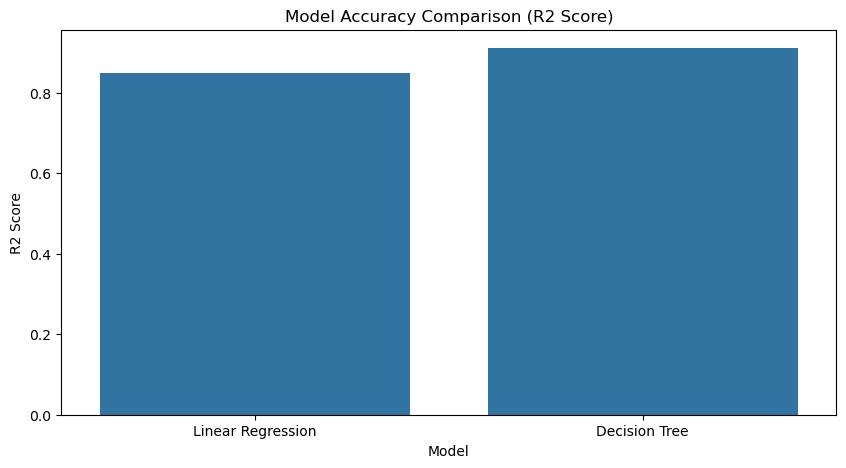

In [24]:
# Visualizations
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='R2 Score', data=results)
plt.title('Model Accuracy Comparison (R2 Score)')
plt.show()


In [25]:
# Saving the Best Model (Decision Tree)
with open('model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)
print("Best Model (Decision Tree) saved as model.pkl")

Best Model (Decision Tree) saved as model.pkl
